
## $\mathbb{F}_5$での足し算
$a+b$


In [1]:
def add(a, b): # F5での足し算
    return (a + b) % 5

In [2]:
print("   " + "  ".join([str(i) for i in range(5)]))
for a in range(5):
    print("{} ".format(a), end="")
    row = []
    for b in range(5):
        row.append(add(a,b))
    print(row)

   0  1  2  3  4
0 [0, 1, 2, 3, 4]
1 [1, 2, 3, 4, 0]
2 [2, 3, 4, 0, 1]
3 [3, 4, 0, 1, 2]
4 [4, 0, 1, 2, 3]


## $\mathbb{F}_5$でのひき算
$a-b$

In [3]:
print("   " + "  ".join([str(i) for i in range(5)]))
for a in range(5):
    print("{} ".format(a), end="")
    row = []
    for b in range(5):
        row.append(add(a,-b))
    print(row)

   0  1  2  3  4
0 [0, 4, 3, 2, 1]
1 [1, 0, 4, 3, 2]
2 [2, 1, 0, 4, 3]
3 [3, 2, 1, 0, 4]
4 [4, 3, 2, 1, 0]


## $\mathbb{F}_5$でのかけ算
$a\times b$

In [4]:
def multiply(a, b): # F5でのかけ算
    return (a * b) % 5

In [5]:
print("   " + "  ".join([str(i) for i in range(5)]))
for a in range(5):
    print("{} ".format(a), end="")
    row = []
    for b in range(5):
        row.append(multiply(a,b))
    print(row)

   0  1  2  3  4
0 [0, 0, 0, 0, 0]
1 [0, 1, 2, 3, 4]
2 [0, 2, 4, 1, 3]
3 [0, 3, 1, 4, 2]
4 [0, 4, 3, 2, 1]


## $\mathbb{F}_5$での割り算
$a \div b$

In [6]:
def inv(n, p): # 剰余 pの世界で逆数を求める関数
    return pow(n, p-2, p) # フェルマーの小定理より
def div(a, b): # F5での割り算
    return (a * inv(b, 5)) % 5

In [7]:
print("   " + "  ".join([str(i) for i in range(1,5)]))
for a in range(5):
    print("{} ".format(a), end="")
    row = []
    for b in range(1,5):
        row.append(div(a,b))
    print(row)

   1  2  3  4
0 [0, 0, 0, 0]
1 [1, 3, 2, 4]
2 [2, 1, 4, 3]
3 [3, 4, 1, 2]
4 [4, 2, 3, 1]


## $\mathbb{F}_{17}$上での楕円曲線$y^2=x^3+x+1$

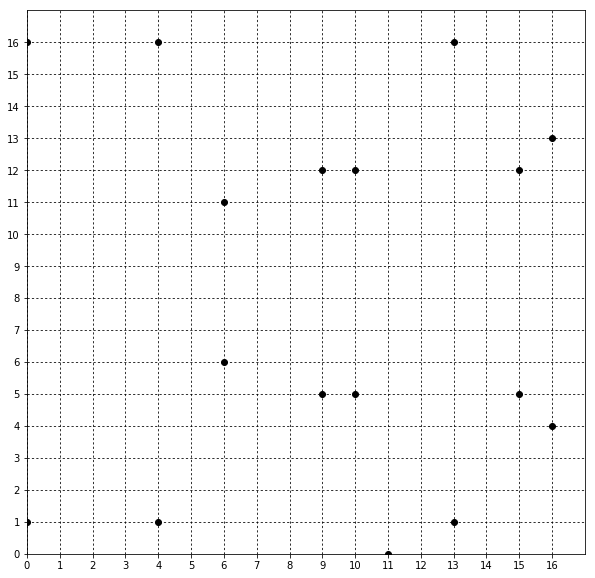

In [8]:
def plot_ec(a, b, p):
    import matplotlib.pyplot as plt
    plt.rcParams["font.size"] = 10
    xlist = []
    ylist = []
    for x in range(p):
        for y in range(p):
            if((x**3 + a * x + b - y**2) % p == 0):
            # 方程式を満たすx,yの組をリストに格納
                xlist.append(x)
                ylist.append(y)
    #以下は表示のため        
    plt.figure(figsize=(10,10))
    plt.axis([0,p,0,p])
    if(p < 55):
        point_style = 'o'
        plt.grid(which='major',linestyle=':'
                 , color="black")
        plt.yticks( [i for i in range(p)] )
        plt.xticks( [i for i in range(p)] )
    else:
        point_style = '.'
    plt.plot(xlist, ylist, point_style, color="black")
    plt.show()

plot_ec(1, 1, 17)

## $\mathbb{F}_{23}$上での楕円曲線$y^2=x^3+x+1$

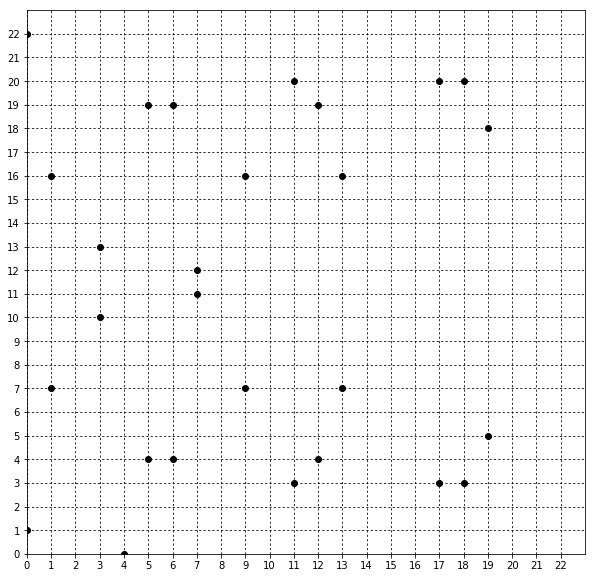

In [9]:
plot_ec(1, 1, 23)

## $\mathbb{F}_{9973}$上での楕円曲線$y^2=x^3+x+1$

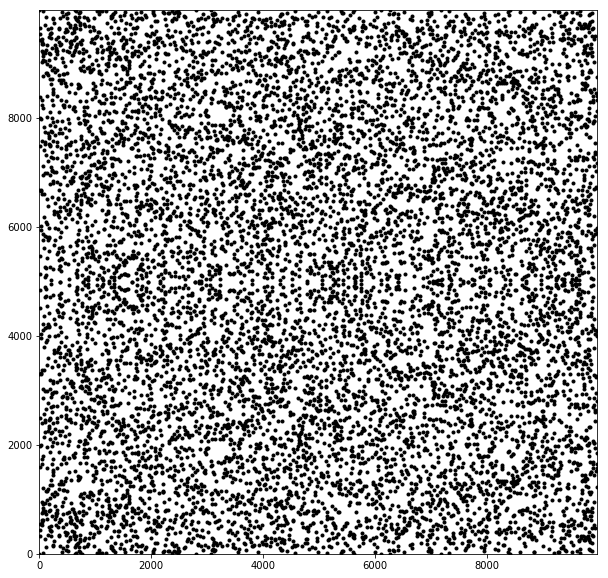

In [10]:
plot_ec(1, 1, 9973)

## $\mathbb{F}_{23}$上での楕円曲線$y^2=x^3+x+1$の点$G=(0,1)$に対して

$G+G=2G$の計算：

In [11]:
# F_p上のy^2=x^3+ax+bでのp, a, b
p, a, b = 23, 1, 1
G=(0,1)
def inv(n, p):
    return pow(n, p-2, p)
def ec_double(A):
    l = (((3 * A[0] **2) + a) * inv(2*A[1], p)) % p
    x = (l ** 2 - A[0] - A[0]) % p
    y = (l * (A[0] - x) - A[1]) % p
    return x, y
G2=ec_double(G)
print(G2) # (6, 19)

(6, 19)


このようにして計算してできた$2G=(6,19)$にもう一度$G$を足して$3G$を作る。

$G+2G=3G$の計算：

In [12]:
def ec_add(A, B):
    l = ((B[1] - A[1]) * inv(B[0] - A[0], p)) % p
    x = (l ** 2 - B[0] - A[0]) % p
    y = (l * (A[0] - x) - A[1]) % p
    return x, y
G3 = ec_add(G2, G)
print(G3) # (3, 13)

(3, 13)


ecdsaライブラリを使って$27G$までを求めてみる

In [13]:
from ecdsa.ellipticcurve import CurveFp, Point
# F_p上のy^2=x^3+ax+bの意味でのp, a, b
p, a, b = 23, 1, 1
c = CurveFp(p,a,b)
# Gをc上の点(0,1)とする
G = Point(c, 0, 1)
current = G
for i in range(1,28):
    print("{}G:\t{}".format(i,current))
    current = current + G

1G:	(0,1)
2G:	(6,19)
3G:	(3,13)
4G:	(13,16)
5G:	(18,3)
6G:	(7,11)
7G:	(11,3)
8G:	(5,19)
9G:	(19,18)
10G:	(12,4)
11G:	(1,16)
12G:	(17,20)
13G:	(9,16)
14G:	(4,0)
15G:	(9,7)
16G:	(17,3)
17G:	(1,7)
18G:	(12,19)
19G:	(19,5)
20G:	(5,4)
21G:	(11,20)
22G:	(7,12)
23G:	(18,20)
24G:	(13,7)
25G:	(3,10)
26G:	(6,4)
27G:	(0,22)


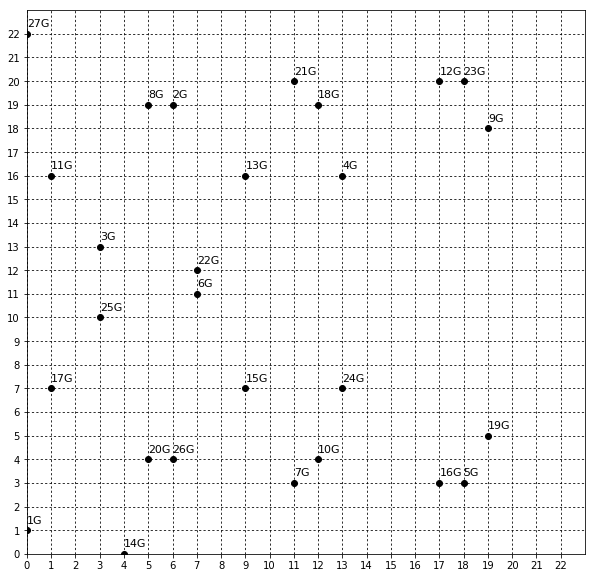

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.axis([0,p,0,p])
plt.grid(which='major',color='black',linestyle=':')
plt.yticks( [i for i in range(p)] )
plt.xticks( [i for i in range(p)] )
# Gをc上の点(0,1)とする
G = Point(c, 0, 1)
current = G
for i in range(1,28):
    plt.plot(current.x(), current.y(), 'o',
             color="black")
    plt.text(current.x(), current.y() + 0.3,
             "{}G".format(i), fontsize=11)
    current = current + G
plt.show()

In [15]:
a = 1 # y^2=x^3+a*x+b におけるa
b = 1 # y^2=x^3+a*x+b におけるb
prime = 23 # 有限体の位数となる素数
G = (0,1) # スカラー倍の基点

def binary_method(P, d):
    Q = P
    bin_str = format(d, 'b') # dの二進数表現文字列
    for bit in bin_str[1:]:
        Q = ec_double(Q)
        if bit == "1": Q = ec_add(Q, P)
    return Q

(18, 20)


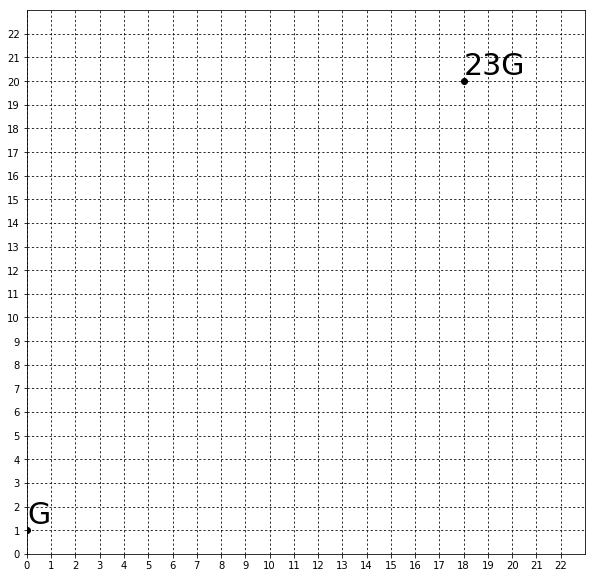

In [16]:
plt.figure(figsize=(10,10))
plt.axis([0,p,0,p])
plt.grid(which='major',color='black',linestyle=':')
plt.yticks( [i for i in range(p)] )
plt.xticks( [i for i in range(p)] )

point = G # (0,1)
plt.plot(point[0], point[1], 'o', color="black")
plt.text(point[0], point[1] + 0.3,"G", fontsize=30)

d = 23
point = binary_method(G, d) # Gの23倍をいきなり求める
print(point) # (18, 20)を出力する
plt.plot(point[0], point[1], 'o', color="black")
plt.text(point[0], point[1] + 0.3,"{}G".format(d), fontsize=30)
plt.show()

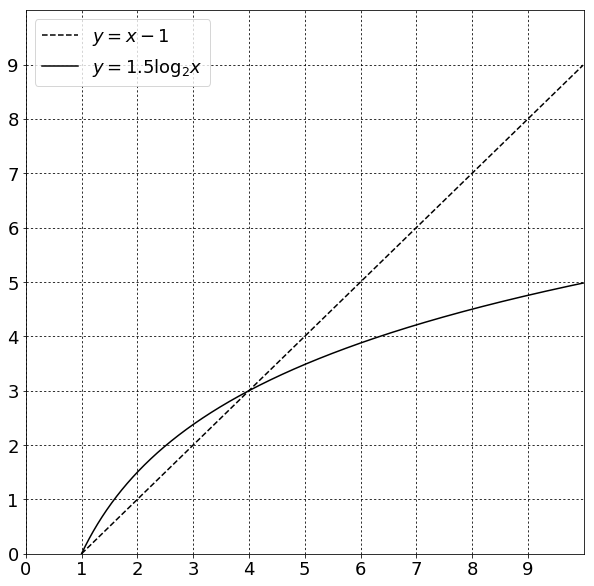

In [17]:
import numpy as np
import math
plt.rcParams["font.size"] = 18
X_range=10
x = np.arange(1,X_range,0.01) 
plt.figure(figsize=(10,10))
plt.axis([0,X_range,0,X_range])
plt.grid(which='major',color='black',linestyle=':')
plt.yticks( [i for i in range(X_range)] )
plt.xticks( [i for i in range(X_range)] )
p1 = plt.plot(x,x-1, label="$y=x-1$", linestyle="--", color="black") 
p2 = plt.plot(x, 1.5 * np.log2(x), label="$y=1.5\log_2{x}$", color="black") 
plt.legend(loc="upper left")
plt.show() 

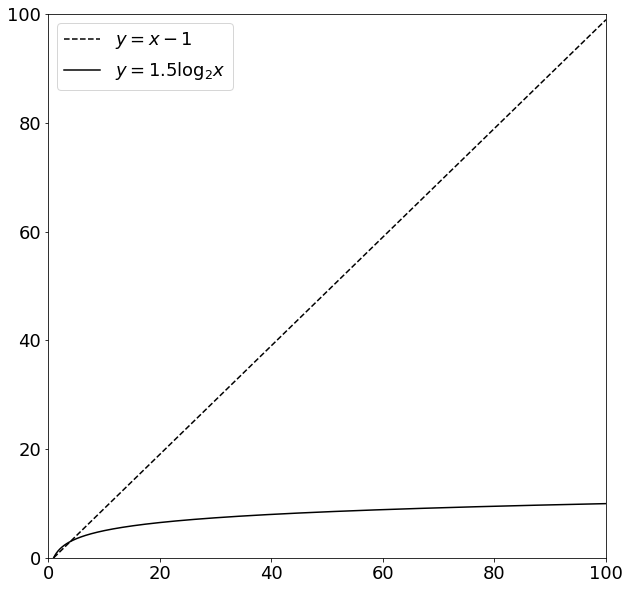

In [18]:
import numpy as np
import math
plt.rcParams["font.size"] = 18
X_range=100
x = np.arange(1,X_range,0.01) 
plt.figure(figsize=(10,10))
plt.axis([0,X_range,0,X_range])

p1 = plt.plot(x,x-1, label="$y=x-1$", linestyle="--", color="black") 
p2 = plt.plot(x, 1.5 * np.log2(x), label="$y=1.5\log_2{x}$", color="black") 
plt.legend(loc="upper left")
plt.show() 

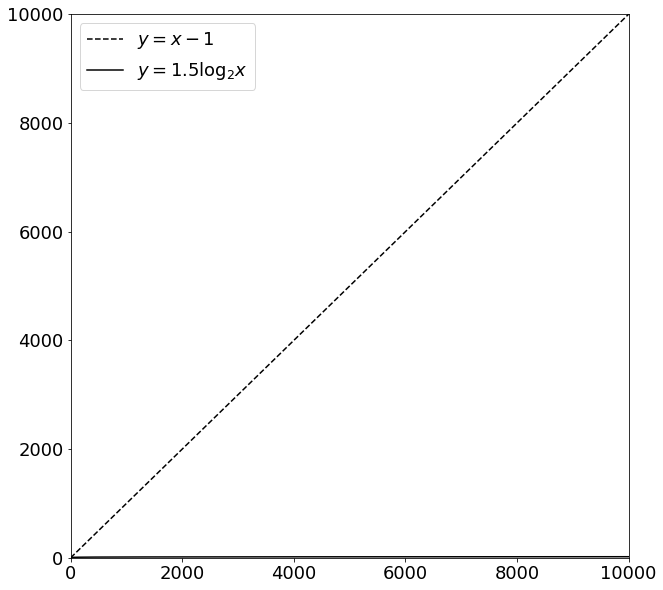

In [19]:
import numpy as np
import math
plt.rcParams["font.size"] = 18
X_range=10000
x = np.arange(1,X_range,0.01) 
plt.figure(figsize=(10,10))
plt.axis([0,X_range,0,X_range])

p1 = plt.plot(x,x-1, label="$y=x-1$", linestyle="--", color="black") 
p2 = plt.plot(x, 1.5 * np.log2(x), label="$y=1.5\log_2{x}$", color="black") 
plt.legend(loc="upper left")
plt.show() 

# ビットコインに使われる楕円曲線のパラメータ

In [20]:
from ecdsa import SECP256k1
c = SECP256k1

## 有限体$\mathbb{F}_p$の標数$p$

In [21]:
c.curve.p()

115792089237316195423570985008687907853269984665640564039457584007908834671663

上記の値は、$2^{256}-2^{32}-2^9-2^8-2^7-2^6-2^4-1$に等しい

In [22]:
(2**256)-(2**32)-(2**9)-(2**8)-(2**7)-(2**6)-(2**4)-1 == c.curve.p()

True

## 楕円曲線の方程式

$y^2=x^3+ax+b$における$a$と$b$


In [23]:
print("a, b = {}, {}".format(c.curve.a(), c.curve.b()))

a, b = 0, 7


つまり、SECP256k1の楕円曲線の方程式は$y^2=x^3+7$

## ベースポイント

$G=(G_x, G_y)$とすると

### $G_x$

In [24]:
c.generator.x()

55066263022277343669578718895168534326250603453777594175500187360389116729240

### $G_y$

In [25]:
c.generator.y()

32670510020758816978083085130507043184471273380659243275938904335757337482424

## $G$の位数

In [26]:
c.order

115792089237316195423570985008687907852837564279074904382605163141518161494337